# **Introdução à Ciência de Dados**

**Professor**: Yuri Malheiros

**Grupo**: Daniel Arnóbio Dantas da Silva, Gustavo Henrique da Silva Costa Araujo e Jardel da Cunha Nascimento.

## **Projeto #4 - Agrupamento de Dados**

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()

In [6]:
resultados_secao = pd.read_csv('https://raw.githubusercontent.com/NigGusta/ICD-Projeto-Final/main/csv/resultados_2T.csv')
colunas = ['zona', 'secao', 'vPresA22', 'vPresB13', 'vPresNulo', 'vPresBranco']
resultados_secao = resultados_secao[colunas]
resultados_secao

,zona,secao,vPresA22,vPresB13,vPresNulo,vPresBranco
0,1,223,151,165,7,4
1,1,104,189,142,10,4
2,1,125,104,152,4,5
3,1,60,146,164,18,6
4,1,142,144,153,24,7
...,...,...,...,...,...,...
1453,77,99,185,171,13,5
1454,77,68,160,131,23,6
1455,77,361,117,172,23,9
1456,77,81,169,147,15,8


In [7]:
resultados_secao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   zona         1458 non-null   int64
 1   secao        1458 non-null   int64
 2   vPresA22     1458 non-null   int64
 3   vPresB13     1458 non-null   int64
 4   vPresNulo    1458 non-null   int64
 5   vPresBranco  1458 non-null   int64
dtypes: int64(6)
memory usage: 68.5 KB


In [8]:
perfil_secao = pd.read_csv('https://raw.githubusercontent.com/NigGusta/ICD-Projeto-Final/main/csv/perfil_eleitorado_secao_jp.csv')
perfil_secao.drop(columns=['ano', 'sigla_uf', 'id_municipio', 'id_municipio_tse', 'situacao_biometria'], inplace=True)
perfil_secao.head()

,zona,secao,genero,estado_civil,grupo_idade,instrucao,eleitores,eleitores_biometria,eleitores_deficiencia,eleitores_inclusao_nome_social
0,76,179,feminino,casado(a),35 a 39 anos,ensino superior completo,27,26,0,0
1,77,288,feminino,solteiro(a),25 a 29 anos,ensino superior incompleto,9,9,0,0
2,76,10,masculino,casado(a),50 a 54 anos,ensino superior completo,10,10,0,0
3,1,223,feminino,solteiro(a),30 a 34 anos,ensino superior completo,11,11,0,0
4,76,361,feminino,solteiro(a),21 a 24 anos,ensino medio completo,12,10,0,0


In [9]:
perfil_secao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33782 entries, 0 to 33781
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   zona                            33782 non-null  int64 
 1   secao                           33782 non-null  int64 
 2   genero                          33782 non-null  object
 3   estado_civil                    33782 non-null  object
 4   grupo_idade                     33782 non-null  object
 5   instrucao                       33782 non-null  object
 6   eleitores                       33782 non-null  int64 
 7   eleitores_biometria             33782 non-null  int64 
 8   eleitores_deficiencia           33782 non-null  int64 
 9   eleitores_inclusao_nome_social  33782 non-null  int64 
dtypes: int64(6), object(4)
memory usage: 2.6+ MB


In [10]:
perfil_secao.groupby('zona')['eleitores'].sum().reset_index()

,zona,eleitores
0,1,18257
1,64,15827
2,70,23648
3,76,28095
4,77,23723


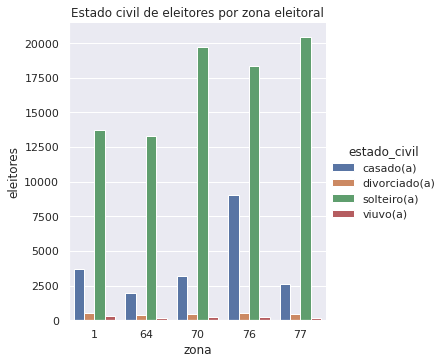

In [11]:
colunas = ['zona', 'estado_civil']
df_estado_civil = pd.DataFrame(perfil_secao.groupby(colunas)['eleitores'].sum()).reset_index()
ax = sns.catplot(data = df_estado_civil, x = 'zona', y = 'eleitores', kind ='bar', hue = 'estado_civil')
plt.title('Estado civil de eleitores por zona eleitoral');


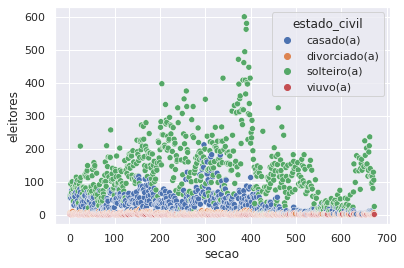

In [12]:
colunas = ['secao', 'estado_civil']
df_estado_civil = pd.DataFrame(perfil_secao.groupby(colunas)['eleitores'].sum()).reset_index()
#df_estado_civil = df_estado_civil.pivot(index = 'secao', columns= 'estado_civil', values='eleitores')
#df_estado_civil.fillna(0, inplace = True)
df_estado_civil
sns.scatterplot(data = df_estado_civil, y = 'eleitores', x='secao', hue = 'estado_civil')

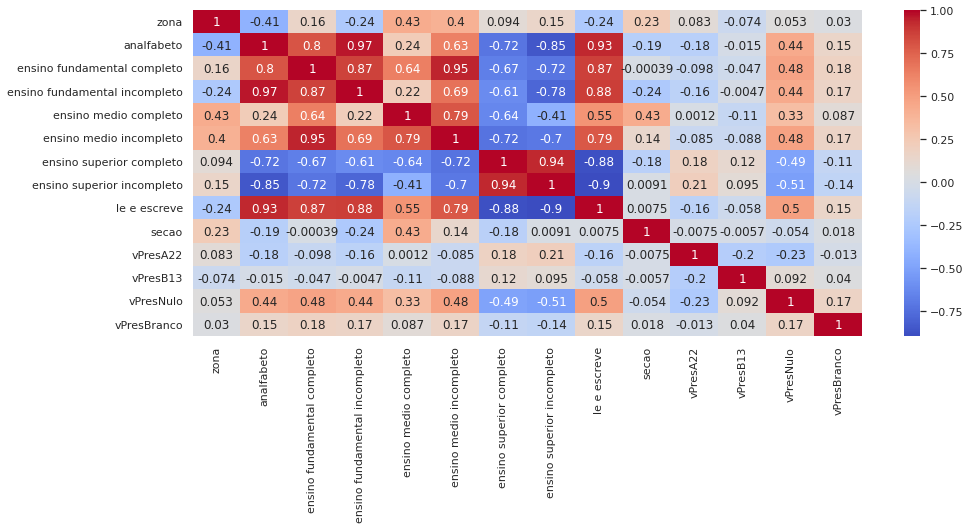

In [13]:
colunas = ['zona', 'instrucao']
df_instrucao = pd.DataFrame(perfil_secao.groupby(colunas)['eleitores'].sum()).reset_index()
df_instrucao = df_instrucao.pivot(index = 'zona', columns= 'instrucao', values='eleitores')
df_instrucao.fillna(0, inplace = True)
df_instrucao = df_instrucao.merge(resultados_secao, on = 'zona', how = 'inner')
plt.figure(figsize=(15, 6))
sns.heatmap(df_instrucao.corr(), cmap='coolwarm', annot= True);

In [14]:
df_grupo_idade_ct = pd.crosstab(index = perfil_secao.zona, columns= perfil_secao.grupo_idade, values = perfil_secao.eleitores, aggfunc='sum').reset_index()
df_grupo_idade_ct

grupo_idade,zona,100 anos ou mais,16 anos,17 anos,18 anos,19 anos,20 anos,21 a 24 anos,25 a 29 anos,30 a 34 anos,...,50 a 54 anos,55 a 59 anos,60 a 64 anos,65 a 69 anos,70 a 74 anos,75 a 79 anos,80 a 84 anos,85 a 89 anos,90 a 94 anos,95 a 99 anos
0,1,1.0,523.0,861.0,1226.0,1162.0,596.0,1632.0,2439.0,2111.0,...,848.0,645.0,440.0,385.0,278.0,176.0,129.0,65.0,28.0,5.0
1,64,NaN,435.0,735.0,1134.0,1078.0,645.0,2370.0,2806.0,1788.0,...,546.0,346.0,251.0,216.0,167.0,121.0,64.0,43.0,13.0,NaN
2,70,NaN,487.0,891.0,1403.0,1286.0,749.0,2960.0,5370.0,3528.0,...,636.0,407.0,378.0,294.0,210.0,126.0,57.0,23.0,6.0,1.0
3,76,4.0,726.0,1000.0,1577.0,1381.0,748.0,2147.0,3755.0,3358.0,...,925.0,1014.0,956.0,753.0,422.0,133.0,94.0,60.0,24.0,4.0
4,77,NaN,707.0,1260.0,1968.0,1791.0,1194.0,3892.0,3966.0,2474.0,...,627.0,393.0,330.0,233.0,146.0,122.0,59.0,27.0,8.0,2.0


Tratando a coluna de grupo_idade

In [15]:
colunas = ['zona', 'grupo_idade']
df_grupo_idade = pd.DataFrame(perfil_secao.groupby(colunas)['eleitores'].sum()).reset_index()
#df_grupo_idade = df_grupo_idade.pivot(index = 'zona', columns= 'grupo_idade', values='eleitores')
df_grupo_idade.fillna(0, inplace = True)
df_grupo_idade

,zona,grupo_idade,eleitores
0,1,100 anos ou mais,1
1,1,16 anos,523
2,1,17 anos,861
3,1,18 anos,1226
4,1,19 anos,1162
...,...,...,...
101,77,75 a 79 anos,122
102,77,80 a 84 anos,59
103,77,85 a 89 anos,27
104,77,90 a 94 anos,8


In [16]:
for i in df_grupo_idade.grupo_idade.unique()[6][4:7]:
    print(i)

 
2
4


In [17]:
def media_idade(serie):
    for i in range(len(serie)):
        if len(serie[i]) == 16:
            serie[i] =  int(serie[i][:3])
        elif len(serie[i]) == 7:
            serie[i] = int(serie[i][:3])
        elif len(serie[i]) == 12:
            serie[i] = (int(serie[i][:3]) + int(serie[i][4:7]))/2
    return serie

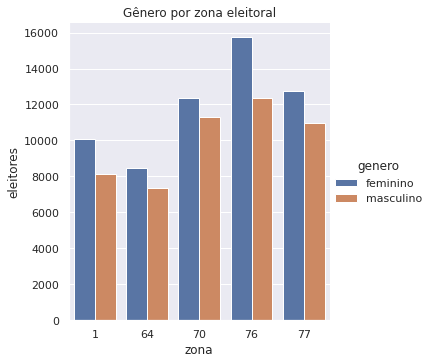

In [18]:
colunas = ['zona', 'genero']
df_genero = pd.DataFrame(perfil_secao.groupby(colunas)['eleitores'].sum()).reset_index()
#df_genero = df_genero.pivot(index = 'zona', columns= 'genero', values='eleitores')
df_genero.fillna(0, inplace = True)
sns.catplot(data = df_genero, x = 'zona', y = 'eleitores', kind ='bar', hue = 'genero')
plt.title('Gênero por zona eleitoral');

In [19]:
colunas = list(df_grupo_idade_ct)
colunas

['zona',
 '100 anos ou mais',
 '16 anos',
 '17 anos',
 '18 anos',
 '19 anos',
 '20 anos',
 '21 a 24 anos',
 '25 a 29 anos',
 '30 a 34 anos',
 '35 a 39 anos',
 '40 a 44 anos',
 '45 a 49 anos',
 '50 a 54 anos',
 '55 a 59 anos',
 '60 a 64 anos',
 '65 a 69 anos',
 '70 a 74 anos',
 '75 a 79 anos',
 '80 a 84 anos',
 '85 a 89 anos',
 '90 a 94 anos',
 '95 a 99 anos']

In [20]:
df_jovem = df_grupo_idade_ct[['zona', '16 anos','17 anos','18 anos','19 anos','20 anos','21 a 24 anos','25 a 29 anos']]
df_jovem

grupo_idade,zona,16 anos,17 anos,18 anos,19 anos,20 anos,21 a 24 anos,25 a 29 anos
0,1,523.0,861.0,1226.0,1162.0,596.0,1632.0,2439.0
1,64,435.0,735.0,1134.0,1078.0,645.0,2370.0,2806.0
2,70,487.0,891.0,1403.0,1286.0,749.0,2960.0,5370.0
3,76,726.0,1000.0,1577.0,1381.0,748.0,2147.0,3755.0
4,77,707.0,1260.0,1968.0,1791.0,1194.0,3892.0,3966.0


In [22]:
total_jovens = df_jovem['16 anos']+df_jovem['17 anos']+df_jovem['18 anos']+df_jovem['19 anos']+df_jovem['20 anos']+df_jovem['21 a 24 anos']+df_jovem['25 a 29 anos']
df_jovem['total']= total_jovens
df_jovem

<ipython-input-22-17c31214c5c9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_jovem['total']= total_jovens


grupo_idade,zona,16 anos,17 anos,18 anos,19 anos,20 anos,21 a 24 anos,25 a 29 anos,total
0,1,523.0,861.0,1226.0,1162.0,596.0,1632.0,2439.0,8439.0
1,64,435.0,735.0,1134.0,1078.0,645.0,2370.0,2806.0,9203.0
2,70,487.0,891.0,1403.0,1286.0,749.0,2960.0,5370.0,13146.0
3,76,726.0,1000.0,1577.0,1381.0,748.0,2147.0,3755.0,11334.0
4,77,707.0,1260.0,1968.0,1791.0,1194.0,3892.0,3966.0,14778.0


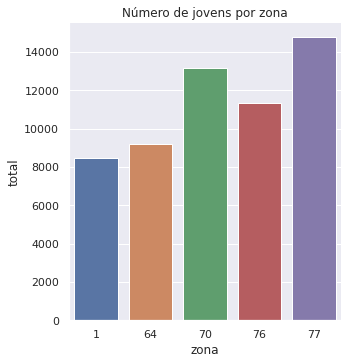

In [23]:
sns.catplot(data = df_jovem, x = 'zona', y = 'total', kind ='bar', )
plt.title('Número de jovens por zona');

In [68]:
#
df_idosos = df_grupo_idade_ct[['zona', '60 a 64 anos','65 a 69 anos','70 a 74 anos','75 a 79 anos','80 a 84 anos','85 a 89 anos','90 a 94 anos','95 a 99 anos','100 anos ou mais']]
df_idosos

grupo_idade,zona,60 a 64 anos,65 a 69 anos,70 a 74 anos,75 a 79 anos,80 a 84 anos,85 a 89 anos,90 a 94 anos,95 a 99 anos,100 anos ou mais
0,1,440.0,385.0,278.0,176.0,129.0,65.0,28.0,5.0,1.0
1,64,251.0,216.0,167.0,121.0,64.0,43.0,13.0,NaN,NaN
2,70,378.0,294.0,210.0,126.0,57.0,23.0,6.0,1.0,NaN
3,76,956.0,753.0,422.0,133.0,94.0,60.0,24.0,4.0,4.0
4,77,330.0,233.0,146.0,122.0,59.0,27.0,8.0,2.0,NaN


In [ ]:
#substituindo o NaN por 0 para nao anular a soma
df_idosos['95 a 99 anos'][1]= 0.0
df_idosos['100 anos ou mais'][1]= 0.0
df_idosos['100 anos ou mais'][2]= 0.0
df_idosos['100 anos ou mais'][4]= 0.0
df_idosos

In [103]:
total_idosos = df_idosos['60 a 64 anos']+df_idosos['65 a 69 anos']+df_idosos['70 a 74 anos']+df_idosos['75 a 79 anos']+df_idosos['80 a 84 anos']+df_idosos['85 a 89 anos']+df_idosos['90 a 94 anos']+df_idosos['95 a 99 anos']+df_idosos['100 anos ou mais']
print(total_idosos)

0    1507.0
1     875.0
2    1095.0
3    2450.0
4     927.0
dtype: float64


In [105]:
df_idosos['total']= total_idosos
df_idosos

<ipython-input-105-0e4b9f06239b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_idosos['total']= total_idosos


grupo_idade,zona,60 a 64 anos,65 a 69 anos,70 a 74 anos,75 a 79 anos,80 a 84 anos,85 a 89 anos,90 a 94 anos,95 a 99 anos,100 anos ou mais,total
0,1,440.0,385.0,278.0,176.0,129.0,65.0,28.0,5.0,1.0,1507.0
1,64,251.0,216.0,167.0,121.0,64.0,43.0,13.0,0.0,0.0,875.0
2,70,378.0,294.0,210.0,126.0,57.0,23.0,6.0,1.0,0.0,1095.0
3,76,956.0,753.0,422.0,133.0,94.0,60.0,24.0,4.0,4.0,2450.0
4,77,330.0,233.0,146.0,122.0,59.0,27.0,8.0,2.0,0.0,927.0


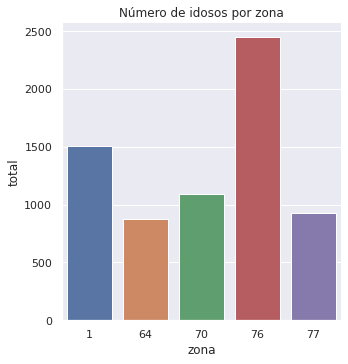

In [107]:

sns.catplot(data = df_idosos, x = 'zona', y = 'total', kind ='bar', )
plt.title('Número de idosos por zona');